# Data Load

In [19]:
import pandas as pd
pd.options.display.max_columns = 100

In [20]:
import warnings
warnings.filterwarnings('ignore')

train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')
d_code = pd.read_csv('data/속성_D_코드.csv', index_col=0).T.to_dict()
h_code = pd.read_csv('data/속성_H_코드.csv', index_col=0).T.to_dict()
l_code = pd.read_csv('data/속성_L_코드.csv', index_col=0).T.to_dict()

# 전처리

## 속성코드 추가

In [21]:
def add_code(df, d_code, h_code, l_code):
    df = df.copy()   

    # D Code
    df['person_prefer_d_1_n'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    # H Code
    df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    # L Code
    df['contents_attribute_l_n'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 세분류코드'])
    df['contents_attribute_l_s'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 소분류코드'])
    df['contents_attribute_l_m'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 중분류코드'])
    df['contents_attribute_l_l'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 대분류코드'])
    return df

In [22]:
train_data = add_code(train_data, d_code, h_code, l_code)
test_data = add_code(test_data, d_code, h_code, l_code)

## True = 1, False = 0으로 변환

In [23]:
def PreprocessingBoolToInt(df):
    for column in df.select_dtypes(include='bool').columns:
        df[column] = df[column].astype(int)
    return df

In [24]:
train_data = PreprocessingBoolToInt(train_data)
test_data = PreprocessingBoolToInt(test_data)

In [25]:
train_data.columns

Index(['id', 'd_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_f', 'person_prefer_g',
       'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
       'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn', 'contents_open_dt',
       'target', 'person_prefer_d_1_n', 'person_prefer_d_1_s',
       'person_prefer_d_1_m', 'person_prefer_d_1_l', 'person_prefer_d_2_n',
       'person_prefer_d_2_s', 'person_prefer_d_2_m', 'person_prefer_d_2_l',
       'person_prefer_

In [26]:
train_data = train_data.reindex(columns=['id', 'd_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_f', 'person_prefer_g',
       'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
       'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn', 'contents_open_dt',
       'person_prefer_d_1_n', 'person_prefer_d_1_s',
       'person_prefer_d_1_m', 'person_prefer_d_1_l', 'person_prefer_d_2_n',
       'person_prefer_d_2_s', 'person_prefer_d_2_m', 'person_prefer_d_2_l',
       'person_prefer_d_3_n', 'person_prefer_d_3_s', 'person_prefer_d_3_m',
       'person_prefer_d_3_l', 'contents_attribute_d_n',
       'contents_attribute_d_s', 'contents_attribute_d_m',
       'contents_attribute_d_l', 'person_prefer_h_1_l', 'person_prefer_h_1_m',
       'person_prefer_h_2_l', 'person_prefer_h_2_m', 'person_prefer_h_3_l',
       'person_prefer_h_3_m', 'contents_attribute_h_l',
       'contents_attribute_h_m', 'contents_attribute_l_n',
       'contents_attribute_l_s', 'contents_attribute_l_m',
       'contents_attribute_l_l', 'target'])

# 탐색

In [31]:
train_data.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l,target
0,0,1,1,1,0,0,0,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1607,1606,1605,2016,1
1,1,0,0,0,1,1,0,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,1607,1606,1605,2016,0
2,2,0,0,0,1,0,0,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,1599,1595,1572,2016,0
3,3,0,0,0,1,0,0,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016,0
4,4,1,1,1,0,0,0,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,1607,1606,1605,2016,0


In [10]:
import matplotlib.pyplot as plt
plt.figure()

import seaborn as sns
sns.countplot(data=train_data, x='d_l_match_yn', hue='target')

ValueError: could not broadcast input array from shape (501951,2) into shape (501951,)

<Figure size 432x288 with 0 Axes>

In [13]:
train_data['person_attribute_a'].unique()

array([1, 2])

## 상관분석

<AxesSubplot:>

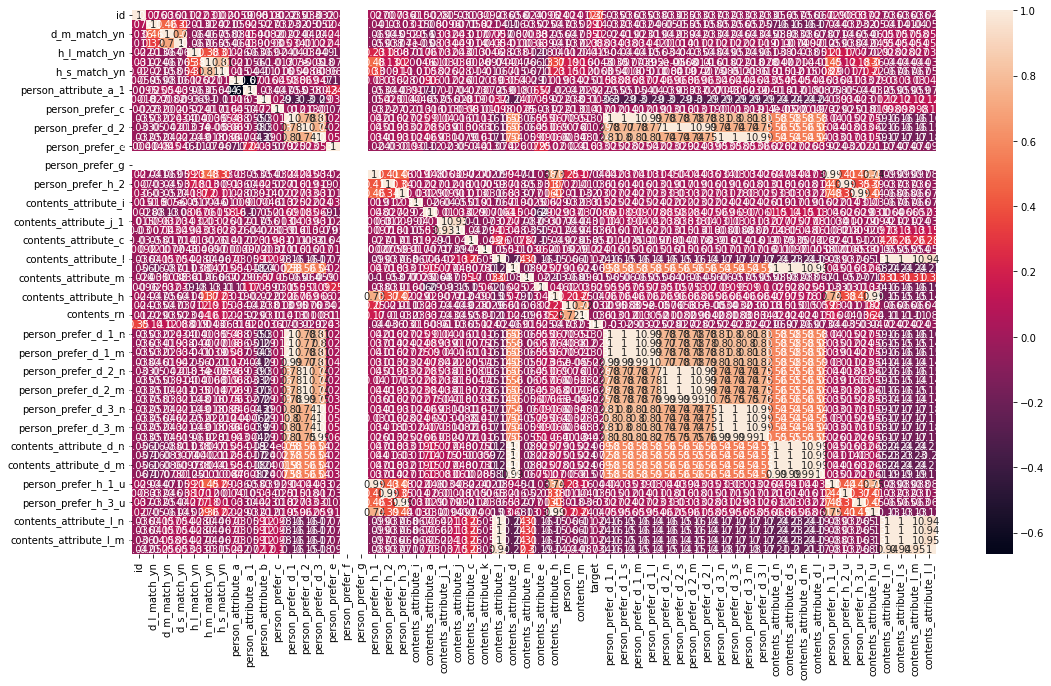

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(18,10))
sns.heatmap(train_data.corr(), annot=True)   

In [ ]:
train_data.corr()

In [60]:
train_data.corrwith(train_data["target"], axis=0).sort_values(ascending=False)

target                    1.000000
id                        0.352250
d_l_match_yn              0.142670
d_m_match_yn              0.118406
d_s_match_yn              0.087591
person_prefer_e           0.032915
contents_attribute_e      0.024869
contents_attribute_k      0.023783
person_attribute_a_1      0.022103
h_l_match_yn              0.018988
person_prefer_c           0.016768
contents_attribute_i      0.014837
h_s_match_yn              0.006311
h_m_match_yn              0.004264
person_attribute_b       -0.003641
contents_attribute_a     -0.008566
contents_attribute_j_1   -0.010707
person_attribute_a       -0.015284
contents_attribute_m     -0.015300
person_prefer_d_3_l      -0.021144
person_prefer_d_3_s      -0.022908
contents_attribute_l_s   -0.023635
contents_attribute_l_n   -0.023698
contents_attribute_l     -0.023740
person_prefer_d_3_m      -0.023886
person_prefer_d_3        -0.023895
person_prefer_d_3_n      -0.023903
contents_attribute_l_m   -0.024426
person_prefer_d_2_l 

# Feature Selection

In [27]:
train_columns = list(train_data.columns)
train_columns.remove('target')
train_columns.remove('person_rn')
train_columns.remove('contents_rn')
train_columns.remove('id')

# Model

## RandomForestClassifier

In [61]:
import time 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

start = time.time()

X_train, X_test, y_train, y_test = train_test_split(train_data[train_columns].select_dtypes(['float64', 'int64']), 
                                                    train_data['target'], 
                                                    test_size=0.2, 
                                                    stratify=train_data['target'])

params = {
    'n_estimators': [300], #list(range(100, 501, 100)),
    'max_features' : [int(np.sqrt(len(train_columns)))],
    'max_depth' : [6], #range(1, 10, 1),
    'min_samples_leaf': [5], #range(1, 11, 1),
    'min_samples_split': [2] #list(range(1, 11, 1))
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=5, n_jobs=-1, scoring='f1')
grid_cv.fit(X_train, y_train)
pred = grid_cv.best_estimator_.predict(X_test)
print(grid_cv.best_score_)
print(grid_cv.best_params_)
print(classification_report(y_test, pred))

end = time.time()
print(f"{end - start:.5f} sec")

0.668661517160068
{'max_depth': 6, 'max_features': 7, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.67      0.81      0.74     50222
           1       0.76      0.60      0.67     50169

    accuracy                           0.71    100391
   macro avg       0.72      0.71      0.70    100391
weighted avg       0.72      0.71      0.70    100391

123.15583 sec


In [65]:
pred_submit = grid_cv.best_estimator_.predict(test_data[train_columns].select_dtypes(['float64', 'int64']))

## KNeighborsClassifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import time 

start = time.time()

X_train, X_test, y_train, y_test = train_test_split(train_data[train_columns].select_dtypes(['float64', 'int64']), 
                                                    train_data['target'], 
                                                    test_size=0.2, 
                                                    stratify=train_data['target'])

scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

params = {
    'n_neighbors' : range(3, 4, 1)   
}
clf = KNeighborsClassifier()
grid_cv = GridSearchCV(clf, param_grid=params, scoring='f1', cv=5, verbose=1)
grid_cv.fit(X_train_norm, y_train)

pred = grid_cv.best_estimator_.predict(X_test_norm)
print(grid_cv.best_score_)
print(grid_cv.best_params_)
print(classification_report(y_test, pred))

end = time.time()
print(f"{end - start:.5f} sec")

Fitting 5 folds for each of 1 candidates, totalling 5 fits


KeyboardInterrupt: 

## XGBClassifier

In [28]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import time 

start = time.time()

import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(train_data[train_columns].select_dtypes(['float64', 'int64']), 
                                                    train_data['target'], 
                                                    test_size=0.3, 
                                                    stratify=train_data['target'])

xgb_wrapper = XGBClassifier(objective = 'binary:logistic')
params = {
    'n_estimators': [300],
    'learning_rate' : [0.1],
    'max_depth': [10, 15],
    'min_samples_split': [3]
}

grid_cv = GridSearchCV(xgb_wrapper, param_grid=params, cv=5, n_jobs=-1, scoring='f1')
grid_cv.fit(X_train, y_train)
pred = grid_cv.best_estimator_.predict(X_test)
print(grid_cv.best_score_)
print(grid_cv.best_params_)
print(classification_report(y_test, pred))

end = time.time()
print(f"{end - start:.5f} sec")

/Users/tedz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/tedz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/tedz/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.

[23:29:08] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:29:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:29:08] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:29:12] W

In [16]:
pred_submit = grid_cv.best_estimator_.predict(test_data[train_columns].select_dtypes(['float64', 'int64']))

KeyError: "['person_prefer_h_1_u', 'person_prefer_h_2_u', 'person_prefer_h_3_u', 'contents_attribute_h_u'] not in index"

# Submission

In [18]:
test_data.columns

Index(['id', 'd_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_f', 'person_prefer_g',
       'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
       'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn', 'contents_open_dt',
       'person_prefer_d_1_n', 'person_prefer_d_1_s', 'person_prefer_d_1_m',
       'person_prefer_d_1_l', 'person_prefer_d_2_n', 'person_prefer_d_2_s',
       'person_prefer_d_2_m', 'person_prefer_d_2_l', 'person_prefer_d_3_n',
       'p

In [33]:
submission = pd.read_csv('data/sample_submission.csv')
submission['target'] = pred_submit
submission.to_csv('submission_XGBClassifier.csv',index=False)